## Plot SS Bouncepoints

In [42]:
import warnings
warnings.filterwarnings('ignore')

import sqlite3
conn = sqlite3.connect("ss.db")
cur  = conn.cursor()

import time
import os

import pandas as pd

qry = """SELECT bouncepoints_full.ID_Full, 
bouncepoints_full.Event, 
bouncepoints_full.Station, 
bouncepoints_full.Network, 
bouncepoints_full.Range, 
bouncepoints_full.MidLat, 
bouncepoints_full.MidLon, 
bouncepoints_full.EvtTime, 
bouncepoints_full.BAzimuth, 
snr.SNR
FROM bouncepoints_full
LEFT JOIN snr 
ON bouncepoints_full.ID_Full=snr.ID_Full
WHERE snr.SNR > 3.0 """

dfds = pd.read_sql_query(qry, conn, index_col=["ID_Full"])
dfds

conn.close()

dfds

,Event,Station,Network,Range,MidLat,MidLon,EvtTime,BAzimuth,SNR
ID_Full,,,,,,,,,
C201401040011A.IC.ENH,C201401040011A,ENH,IC,170.380568,64.487396,-76.379985,2014-01-04T00:11:55.400000Z,2.525836,3.074457
C201401072302A.II.NIL,C201401072302A,NIL,II,150.904447,70.997100,-102.575500,2014-01-07T23:02:57.800000Z,358.606214,3.286390
C201401080422A.IU.ULN,C201401080422A,ULN,IU,152.888216,55.607766,-66.016157,2014-01-08T04:22:15.400000Z,355.994468,4.271263
C201401130401A.IC.HIA,C201401130401A,HIA,IC,111.516465,74.436083,-81.071199,2014-01-13T04:01:09.100000Z,6.629530,3.588503
C201401130401A.IC.MDJ,C201401130401A,MDJ,IC,114.683867,72.373733,-104.634703,2014-01-13T04:01:09.100000Z,16.986798,3.897003
C201401130401A.II.ERM,C201401130401A,ERM,II,113.046760,64.519224,-118.042306,2014-01-13T04:01:09.100000Z,30.693026,6.295181
C201401130401A.IU.BILL,C201401130401A,BILL,IU,84.760774,58.221189,-89.497886,2014-01-13T04:01:09.100000Z,49.423713,3.594863
C201401160733A.MC.OLV2,C201401160733A,OLV2,MC,92.879111,50.634812,-101.695183,2014-01-16T07:33:13.000000Z,325.939332,3.742650
C201401160733A.XO.KK44,C201401160733A,KK44,XO,64.335575,54.485058,-124.755693,2014-01-16T07:33:13.000000Z,315.934147,3.693870


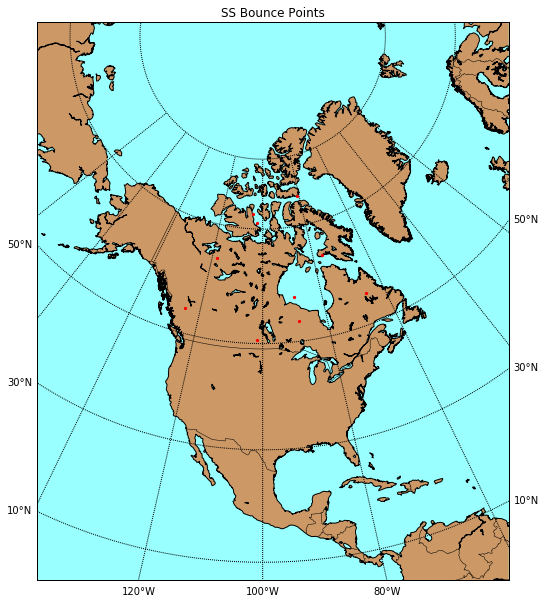

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Lambert Conformal Conic map.
m = Basemap(llcrnrlon=-135.,llcrnrlat=0.,urcrnrlon=45.,urcrnrlat=61.,
            projection='lcc',lat_1=35.,lat_2=45.,lon_0=-100.,
            resolution ='l',area_thresh=1000.)
# read shapefile.
#shp_info = m.readshapefile('../../../examples/huralll020','hurrtracks',drawbounds=False)
# find names of storms that reached Cat 4.
names = []

plt.figure(1,figsize=(10,10))

# draw coastlines, meridians and parallels.
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(10,71,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-180,0,20),labels=[0,0,0,1])

x, y = m( np.array(dfds['MidLon']), np.array(dfds['MidLat']) )

m.scatter(x, y, color='red', marker = '.', zorder = 10000)

plt.title('SS Bounce Points')
plt.savefig('bpts_NA.eps')
plt.show()